# Problem 2: The AS-AD Model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **exante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [1]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

In [2]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Question 1
Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [3]:
# Defining the AD and the SRAS functions

# i. Defining symbols
sm.init_printing(use_unicode=True)
pit = sm.symbols('pi_t')
pit1 = sm.symbols('pi_t-1')
alpha = sm.symbols('alpha')
gamma = sm.symbols('gamma')
phi = sm.symbols('phi')
h = sm.symbols('h')
b = sm.symbols('b')
vt = sm.symbols('v_t')
yt = sm.symbols('y_t')
yt1 = sm.symbols('y_t-1')
st = sm.symbols('s_t')
st1 = sm.symbols('s_t-1')


# ii. AD-curve 
AD = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit)

# iii. SRAS-curve 
SRAS = sm.Eq(pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1, pit)



The equilibrium value of y is:


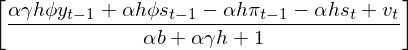

In [4]:
# Solving for y

# i. Setting AD equal to SRAS 
AD_SRAS = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1)

# ii. Solving for y 
yt_star = sm.solve(AD_SRAS, yt)

# iii. Printing y*
print(f'The equilibrium value of y is:')
yt_star

The equilibrium value of pi is:


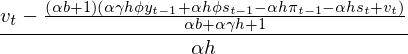

In [5]:
# Solving for pi 

# i. Inserting y* in the AD function
pit_star = 1/(h*alpha)*(vt-(1+b*alpha)*yt_star[0])

# ii. Printing pi*
print(f'The equilibrium value of pi is:')
pit_star

## Question 2
Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [6]:
# Defining variable values 
yt1_int = 0 
pit1_int = 0 
vt_int = 0 
st_int = 0 
st1_int = 0 

vt_one = 0.1


## Solving numerically for y 

# a. Defining a lambda function of yt_eq 
_sol_y_func = sm.lambdify((h,b,alpha,gamma,phi,vt,st,pit1,yt1,st1),yt_star[0])

# b. Defining a function which solve for y, given values and parameters 
def sol_y_func(vt,st,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_y_func(h,b,alpha,gamma,phi,vt,st,pit1,yt1,st1)

# c. Solving for y and printing the solution 
y_star = sol_y_func(vt=vt_int,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of y, given variable values and parameters is: {y_star}')



##  Solving for pi 

# a. Defining a lambda function of yt_eq 
_sol_pi_func = sm.lambdify((h,b,alpha,gamma,phi,yt,vt,st,pit1,yt1,st1),pit_star)

# b. Defining a function which solve for pi, given values and parameters
def sol_pi_func(vt,st,yt,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_pi_func(h,b,alpha,gamma,phi,yt,vt,st,pit1,yt1,st1)

# c. Solving for pi, using the value of y_star, and printing the solution 
pi_star = sol_pi_func(vt=vt_int,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of pi, given variable values and parameters is: {pi_star}')



The equilibrium value of y, given variable values and parameters is: 0.0
The equilibrium value of pi, given variable values and parameters is: 0.0


In [7]:
# Illustration 

# Define AD and SRAS curves as functions
def AD_curve(h,b,alpha,vt,yt): 
    return 1/(h*alpha)*(vt-(1+b*alpha)*yt)
                        
                        
def SRAS_curve(gamma,phi,pit1,yt,yt1,st,st1): 
    return pit1+gamma*yt-phi*gamma*yt1+st-phi*st1

In [8]:
## DENNE CELLE SKAL IKKE NØDVENDIGVIS BRUGES

# Constructing graph

def harry(vt_val): 
    # a. Finding equilibrium given vt
    y_opt = sol_y_func(vt=vt_val,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    pi_opt = sol_pi_func(vt=vt_val,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    
    # b. Constructing curves 
    y = np.linspace(-0.1,0.1,100)
    AD = AD_curve(h=par['h'],b=par['b'],alpha=par['alpha'],vt=vt_val,yt=y)
    SRAS = SRAS_curve(gamma=par['gamma'],phi=par['phi'],pit1=pit1_int,yt1=yt1_int,st=st_int,st1=st1_int,yt=y)

    # c. Generating graph
    # i.  Font sizes
    title_font = {'size':'15'}
    label_font = {'size':'12'}
    # ii. Graph
    plt.figure(figsize=(10,6))
    plt.plot(y,AD,label='AD')
    plt.plot(y,SRAS,label='SRAS')
    plt.grid(True)
    # iii. Title and labels
    plt.title('AD and SRAS', **title_font)
    plt.xlabel('$y_t$', **label_font)
    plt.ylabel('$\pi_t$', **label_font)
    plt.ylim(-0.2,0.2)
    # c. Add lines which show optimal values of y and pi 
    plt.axvline(y_opt, linestyle='dashed', color="grey")
    plt.axhline(pi_opt, linestyle='dashed', color="grey")
    
    plt.legend()


# Interactive graph with slider
def ron(): 
    widgets.interact(harry, 
                     vt_val=widgets.FloatSlider(
                         value=0, 
                         description='Value of $v_t$', 
                         min=0,
                         max=0.1, 
                         step=0.01, 
                         disabled=False, 
                         continuous_update=False));

# ron()

# Interactive graph with dropdown 
def hermione(): 
    widgets.interact(harry, 
                    vt_val=widgets.Dropdown(
                    description='Value of $v_t$', 
                    options=[0,0.1], 
                    value=0),);
    
# hermione();
    

The equilibrium value of y and pi, given vt = 0:  (0.0;0.0)
The equilibrium value of y and pi, given vt = 0.1:  (0.0244;0.00183)


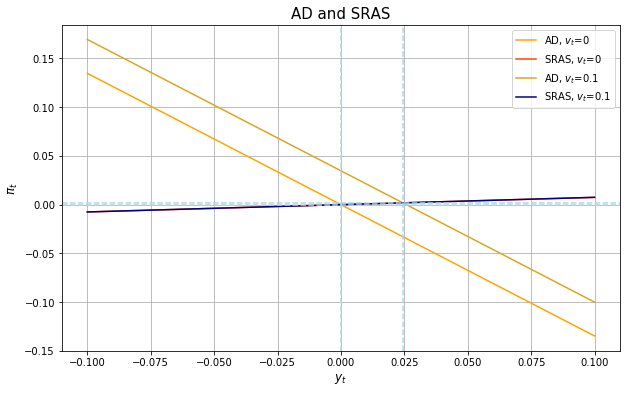

In [9]:
# Calculating equilibrium values for vt = 0 and vt=0.1
y_star_new = sol_y_func(vt=vt_one,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
pi_star_new = sol_pi_func(vt=vt_one,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of y and pi, given vt = 0: \v ({y_star};{pi_star})')
print(f'The equilibrium value of y and pi, given vt = 0.1: \v ({y_star_new:.3};{pi_star_new:.3})')

# a. Finding equilibrium given vt=0 and vt=0.1
def snape(): 
    y_one = sol_y_func(vt=0,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    pi_one = sol_pi_func(vt=0,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    y_two = sol_y_func(vt=0.1,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    pi_two = sol_pi_func(vt=0.1,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)

    # b. Constructing curves 
    y = np.linspace(-0.1,0.1,100)
    AD_one = AD_curve(h=par['h'],b=par['b'],alpha=par['alpha'],vt=0,yt=y)
    SRAS_one = SRAS_curve(gamma=par['gamma'],phi=par['phi'],pit1=pit1_int,yt1=yt1_int,st=st_int,st1=st1_int,yt=y)
    AD_two = AD_curve(h=par['h'],b=par['b'],alpha=par['alpha'],vt=0.1,yt=y)
    SRAS_two = SRAS_curve(gamma=par['gamma'],phi=par['phi'],pit1=pit1_int,yt1=yt1_int,st=st_int,st1=st1_int,yt=y)

    # c. Generating graph
    # i.  Font sizes
    title_font = {'size':'15'}
    label_font = {'size':'12'}
    # ii. Graph
    plt.figure(figsize=(10,6))
    plt.plot(y,AD_one,color='orange',label='AD, $v_t$=0')
    plt.plot(y,SRAS_one,color='orangered',label='SRAS, $v_t$=0')
    plt.plot(y,AD_two,color='goldenrod',label='AD, $v_t$=0.1')
    plt.plot(y,SRAS_two,color='navy',label='SRAS, $v_t$=0.1')
    plt.grid(True)
    # iii. Title and labels
    plt.title('AD and SRAS', **title_font)
    plt.xlabel('$y_t$', **label_font)
    plt.ylabel('$\pi_t$', **label_font)
    # c. Add lines which show optimal values of y and pi 
    plt.axvline(y_one, linestyle='dashed', color="lightblue")
    plt.axhline(pi_one, linestyle='dashed', color="lightblue")
    plt.axvline(y_two, linestyle='dashed', color="lightblue")
    plt.axhline(pi_two, linestyle='dashed', color="lightblue")

    plt.legend()

snape();

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [10]:
par['delta'] = 0.80
par['omega'] = 0.15

## Question 3:
Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In [11]:
# Constructing AR(1) processes 

# Defining intial values 
y1 = 0
pi_init = 0
s_init = 0

v_init = 0
x0 = 0.1
xt = 0 
ct = 0 

# Number of variable values 
num = 1000

# Creating list, contraining x number values of vt
vt = []
vt_num = par['delta'] * v_init + x0
vt.append(vt_num)
def v_func(number=num):
    """
    Function which creates list of vt values
    Args: 
        number = Number of values in list
    """
    for i in range(0,number): 
        vt_i = par['delta']*vt[i] + xt
        vt.append(vt_i)
        
    return vt

vt = v_func();
        
# Creating list, contraining x number values of st
st = []
st_num = par['omega']* s_init + ct
st.append(st_num)
def s_func(number=num): 
    """
    Function which creates list of st values
    Args: 
        number = Number of values in list
    """
    for i in range(0,number):
        st_i = par['omega']*st[i] + ct
        st.append(st_i)
        
    return st
        
st = s_func();

In [12]:
# Constructing list of y* and pi*
y_stars = [0]
pi_stars = [0]

def y_solve(number=num): 
    for i in range(1,num):
        # y 
        y_star_i = sol_y_func(vt=vt[i],st=st[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
        y_stars.append(y_star_i)
        # Pi
        pi_star_i = sol_pi_func(vt=vt[i],st=st[i],yt=y_stars[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
        pi_stars.append(pi_star_i)

y_solve();

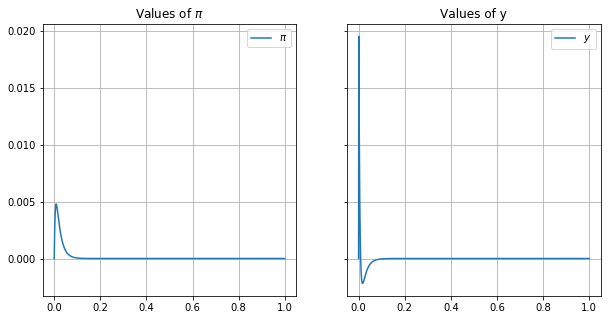

In [13]:
# Illustrating the evolution of the economy 
x_axis = np.linspace(0,1,1000)

# Constructing graph
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.plot(x_axis,pi_stars, label='$\pi$')
ax1.set_title('Values of $\pi$')
# ax1.ylabel('$\pi_t$')
ax1.grid(True)
ax1.legend()
ax2.plot(x_axis,y_stars, label="$y$")
ax2.set_title('Values of y')
# ax2.ylabel('$y_t$')
ax2.grid(True)
ax2.legend()

plt.show();


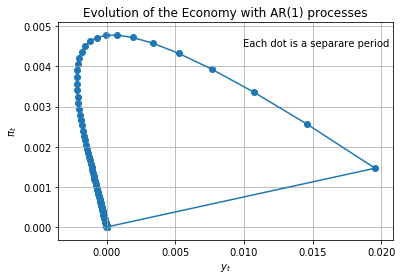

In [14]:
# Illustrating the evolution of the economy 
plt.plot(y_stars,pi_stars)
plt.scatter(y_stars,pi_stars)
plt.grid(True)

plt.title("Evolution of the Economy with AR(1) processes")
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')
plt.text(0.0099,0.0045,'Each dot is a separare period')
    
plt.show();


In [15]:
# Illustrating moves in AD and SRAS curves 

# a. Shocks and Convergence in AD and SRAS curves 
def AD_shock(yt,period, h=par['h'],b=par['b'],alpha=par['alpha'],vt=vt): 
    """Function which generates AD curves following a shock
    Args:
        yt: Vector of y values
        period: Number of periods after initial shock
        h: Parameter 
        b: Parameter 
        alpha: Parameter 
        vt: Vector of shocks
    """
    if period == 0: 
        return 1/(h*alpha)*(0-(1+b*alpha)*yt)
    else:
        return 1/(h*alpha)*(vt[period-1]-(1+b*alpha)*yt)
    
def SRAS_shock(yt,period,gamma=par['gamma'],phi=par['phi'],st=st): 
    """Function which generates SRAS curves following a shock
    Args: 
        yt: Vector of y values
        period: Number of periods after initial shock 
        gamma: Parameter
        phi: Parameter
        pi: Vector of pi values
        yt: Vector of y values
        st: Vector of shocks
        """
    if period == 0: 
        return pi_init + gamma*yt - phi*y1 + st[period] - phi*s_init
    else:
        y_values = [0]
        pi_values = [0]
        for i in range(1,num): 
            y_val_i = sol_y_func(vt=vt[i],st=st[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
            y_values.append(y_val_i)
            pi_val_i = sol_pi_func(vt=vt[i],st=st[i],yt=y_stars[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
            pi_values.append(pi_val_i)
        return pi_values[period-1] + gamma*yt - phi*gamma*y_values[period-1] + st[period] - phi*st[period-1] 
        

# b. Constructing graph

def sherlock(period): 
    """Constructs figure of convergence in the economy following a shock
    Args: 
        period: Number of periods after inital shock
    Note: 
        The graph is meant to be called through the watson function, which turn the graph interactive.
        Thus, the function should not be called on its own.
    """
    # i. Constructing curves 
    y = np.linspace(-0.05,0.05,100)
    AD_zero = AD_shock(y,0,vt=vt)
    AD_i = AD_shock(y,period,vt=vt)
    
    SRAS_zero = SRAS_shock(y,0,st=st)
    SRAS_i = SRAS_shock(y,period,st=st)
    
    # ii. Graphs
    # (a) Font sizes
    title_font = {'size':'20'}
    label_font = {'size':'15'}
    # (b) AD curves
    plt.figure(figsize=(12,6))
    plt.plot(y,AD_zero,label=('AD'),linewidth=3,color='blue')
    plt.plot(y,AD_i,label='$AD new$',color='lightblue')
    
    # (c) SRAS curves
    plt.plot(y,SRAS_zero,label='SRAS',linewidth=3,color='orange')
    plt.plot(y,SRAS_i,label='$SRAS new$',color='red')
    
    # (d) Graph properties 
    plt.grid(True)
    plt.title('AD and SRAS', **title_font)
    plt.xlabel('$y_t$', **label_font)
    plt.ylabel('$\pi_t$', **label_font)
    plt.ylim(-0.1,0.12)

    # d. Add lines which show optimal values of y and pi 
    plt.axvline(y_star, linestyle='dashed', label='$y^*$')
    plt.axhline(pi_star, linestyle='dashed', label='$\pi^*$')
    
    plt.legend()


# Turn graph interactive 
def watson(): 
    widgets.interact(sherlock, 
                    period=widgets.Dropdown(
                    description='Period after initial shock', 
                    options=[1,5,10,50,100,500,1000], 
                    value=1),
                    );
# watson();


def lestrade(): 
    widgets.interact(sherlock, 
                     period=widgets.IntSlider(
                         value=0, 
                         description='Period', 
                         min=0,
                         max=100, 
                         step=1, 
                         disabled=False, 
                         continuous_update=False));
    
lestrade();


interactive(children=(IntSlider(value=0, continuous_update=False, description='Period'), Output()), _dom_class…

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [16]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

## Question 4
Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [17]:
# Constructing x and c
seed = 11
np.random.seed(seed)
x = np.random.normal(0,par['sigma_x'],1000)
x[0] = 0
c = np.random.normal(0,par['sigma_c'],1000)
c[0] = 0 

In [18]:
# New vt and st vector 

# a. Number of variable values 
num = 1000

# b. Creating list, contraining x number values of vt
vt_new = [0]
def v_func(number=num):
    """
    Function which creates list of vt values
    Args: 
        number = Number of values in list
    """
    for i in range(1,number): 
        vt_i = par['delta']*vt_new[i-1] + x[i]
        vt_new.append(vt_i)
        
    return vt_new

vt_new = v_func();
        
# c. Creating list, contraining x number values of st
def s_func(number=num): 
    """
    Function which creates list of st values
    Args: 
        number = Number of values in list
    """
    st_new = [0]
    for i in range(1,number):
        st_i = par['omega']*st_new[i-1] + c[i]
        st_new.append(st_i)
        
    return st_new
        
st_new = s_func();

In [37]:
# Illustrating AD and SRAS curves with new shocks 
# b. Constructing graph

def mycraft(period): 
    """Constructs figure of convergence in the economy following a shock
    Args: 
        period: Number of periods after inital shock
    Note: 
        The graph is meant to be called through the irene function, which turn the graph interactive.
        Thus, the function should not be called on its own.
    """
    # i. Constructing curves 
    y = np.linspace(-1,1,100)
    AD_zero = AD_shock(y,0,vt=vt_new)
    AD_i = AD_shock(y,period,vt=vt_new)
    
    SRAS_zero = SRAS_shock(y,0,st=st_new)
    SRAS_i = SRAS_shock(y,period,st=st_new)
    
    # ii. Graphs
    # (a) Font sizes
    title_font = {'size':'20'}
    label_font = {'size':'15'}
    # (b) AD curves
    plt.figure(figsize=(12,6))
    plt.plot(y,AD_zero,label=('AD'),linewidth=3,color='blue')
    plt.plot(y,AD_i,label='$AD new$',color='lightblue')
    
    # (c) SRAS curves
    plt.plot(y,SRAS_zero,label='SRAS',linewidth=3,color='orange')
    plt.plot(y,SRAS_i,label='$SRAS new $',color='red')
    
    # (d) Graph properties 
    plt.grid(True)
    plt.title('AD and SRAS', **title_font)
    plt.ylim(-5,5)
    plt.xlabel('$y_t$', **label_font)
    plt.ylabel('$\pi_t$', **label_font)

    # d. Add lines which show optimal values of y and pi 
    plt.axvline(y_star, linestyle='dashed', label='$y^*$')
    plt.axhline(pi_star, linestyle='dashed', label='$\pi^*$')
    
    plt.legend(loc='upper right')
    


# Turn graph interactive 
def irene(): 
    widgets.interact(mycraft, 
                    period=widgets.Dropdown(
                    description='Period after initial shock', 
                    options=[1,5,10,50,100,200,600,800], 
                    value=1),
                    );
    
#irene();

def moriarty(): 
    widgets.interact(mycraft, 
                     period=widgets.IntSlider(
                         value=0, 
                         description='Period', 
                         min=0,
                         max=999, 
                         step=10, 
                         disabled=False, 
                         continuous_update=False));
    
moriarty();

interactive(children=(IntSlider(value=0, continuous_update=False, description='Period', max=999, step=10), Out…

# Tilføj Equilibrium Path

In [20]:
# Simulating the Economy 

# Adding equilibrum values as initial values 
y_sim = [0]
pi_sim = [0]

for i in range(1,num): 
    y_val_i = sol_y_func(vt=vt_new[i],st=st_new[i],pit1=pi_sim[i-1],yt1=y_sim[i-1],st1=st_new[i-1])
    y_sim.append(y_val_i)
    pi_val_i = sol_pi_func(vt=vt_new[i],st=st_new[i],yt=y_sim[i],pit1=pi_sim[i-1],yt1=y_sim[i-1],st1=st_new[i-1])
    pi_sim.append(pi_val_i)

In [36]:
# Calculate variances of y_sim and pi_sim
y_var = np.var(y_sim)
pi_var = np.var(pi_sim)

# Calculate correlation between y_sim and pi_sim
y_pi_matrix = np.corrcoef(y_sim,pi_sim)
y_pi_corr = y_pi_matrix[0,1]

# Calculate autocorrelations
y_matrix = np.corrcoef(y_sim[:-1],y_sim[1:])
y_corr = y_matrix[0,1]
pi_matrix = np.corrcoef(pi_sim[:-1],pi_sim[1:])
pi_corr = pi_matrix[0,1]

print(f'The variance of y is: {y_var:.4f}')
print(f'The variance of pi is: {pi_var:.4f}')
print(f'The correlation between y and pi is: {y_pi_corr:.4f}')
print(f'The autocorrelation of y is: {y_corr:.4f}')
print(f'The autocorrelation of pi is: {pi_corr:.4f}')

The variance of y is: 1.8036
The variance of pi is: 1.2007
The correlation between y and pi is: -0.0826
The autocorrelation of y is: 0.7575
The autocorrelation of pi is: 0.9797


# Fix Latex tekst!

## Question 5
Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

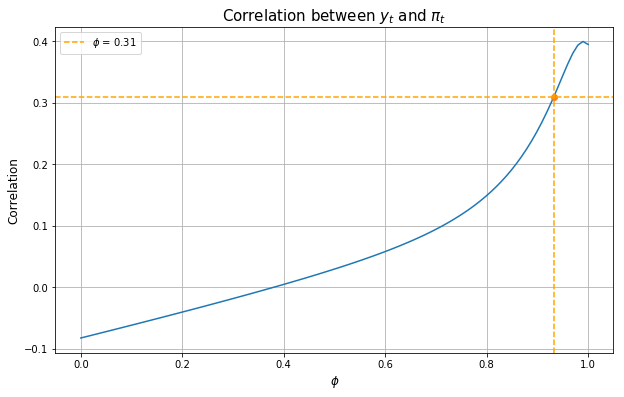

In [35]:
# Defining the correlation as a function 
y1 = 0
pi_init = 0
s_init = 0

v_init = 0
x0 = 0.1
xt = 0 
ct = 0 

def superman(s): 
    y_phi = [0]
    pi_phi = [0]
    for i in range(1,num): 
        y_sim_new = sol_y_func(vt=vt_new[i],st=st_new[i],pit1=pi_phi[i-1],yt1=y_phi[i-1],st1=st_new[i-1],phi=s)
        y_phi.append(y_sim_new)
        pi_sim_new = sol_pi_func(vt=vt_new[i],st=st_new[i],yt=y_phi[i],pit1=pi_phi[i-1],yt1=y_phi[i-1],st1=st_new[i-1],phi=s)
        pi_phi.append(pi_sim_new)
    return np.corrcoef(y_phi,pi_phi)[0,1]

# Finding the value of phi which give the correlation 0.31
x0 = 0 
def batman(x):
    return (superman(x)-0.31)**2

obj_func = lambda x: superman(x)-0.31

result = optimize.minimize(batman,x0)
phi_val = result.x

# Plot 
x = np.linspace(0,1,100)
y = np.empty(100)
for i,X in enumerate(x):
    y[i] = superman(X)
    
# i.  Font sizes
title_font = {'size':'15'}
label_font = {'size':'12'}
# ii. Figure
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.plot(phi_val,0.31, marker='o')
plt.axvline(phi_val, linestyle='dashed', color="orange")
plt.axhline(0.31, linestyle='dashed', color="orange", label='$\phi$ = 0.31')
plt.title('Correlation between $y_t$ and $\pi_t$', **title_font)
plt.xlabel('$\phi$', **label_font)
plt.ylabel('Correlation', **label_font)
plt.grid(True)
plt.legend()

plt.show();



In [23]:
x0 = 0 
def batman(x):
    return (superman(x)-0.31)**2

obj_func = lambda x: superman(x)-0.31

result = optimize.minimize(batman,x0)
phi_val = result.x

## Quesiton 6
Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

In [24]:
def spiderman(s): 
    y_phi = [0]
    pi_phi = [0]
    for i in range(1,num): 
        y_sim_new = sol_y_func(vt=vt_new[i],st=st_new[i],pit1=pi_phi[i-1],yt1=y_phi[i-1],st1=st_new[i-1],phi=s)
        y_phi.append(y_sim_new)
        pi_sim_new = sol_pi_func(vt=vt_new[i],st=st_new[i],yt=y_phi[i],pit1=pi_phi[i-1],yt1=y_phi[i-1],st1=st_new[i-1],phi=s)
        pi_phi.append(pi_sim_new)
    y_variance = np.var(y_phi) - y_var_val
    pi_variance = np.var(pi_phi) - pi_var_val
    y_pi_correlation = np.corrcoef(y_phi,pi_phi)[0,1] - y_pi_corr_val
    y_correlation = np.corrcoef(y_sim[:-1],y_sim[1:])[0,1] - y_corr_val
    pi_correlation = np.corrcoef(pi_phi[:-1],pi_phi[1:])[0,1] - pi_corr
    return y_variance, pi_variance, y_pi_correlation, y_correlation, pi_correlation

In [25]:
y_var_val = 1.64 
pi_var_val = 0.21
y_pi_corr_val = 0.31
y_corr_val = 0.84
pi_corr_val = 0.48

x0 = np.zeros(5)

def flash(x):
    y_var_min = (spiderman(x)[0] - y_var_val)**2
    pi_var_min = (spiderman(x)[1] - pi_var_val)**2
    y_pi_corr_min = (spiderman(x)[2] - y_pi_corr_val)**2
    y_corr_min = (spiderman(x)[3] - y_corr_val)**2
    pi_corr_min = (spiderman(x)[4] - pi_corr_val)**2
    return np.sum(np.array([y_var_min, pi_var_min, y_pi_corr_min, y_corr_min, pi_corr_min]))
   

#result = optimize.minimize(flash,x0)
#result.x


# Forsøg på Optimizer

In [27]:
# Defining values we wish to obtain
y_var_val = 1.64 
pi_var_val = 0.21
y_pi_corr_val = 0.31
y_corr_val = 0.84
pi_corr_val = 0.48

# Generating vectors 
vt_friends = [0]
st_friends = [0]
pi_friends = [0]
y_friends = [0]

# Dictionary of parameters 
monica = {}

monica['sigma_x'] = 0
monica['sigma_x'] = 0.5
monica['phi'] = 0.9
 
    
# Function which is to be optimized     
def chandler(rachel):
    seed = 11
    np.random.seed(seed)
    x = np.random.normal(0,rachel[0],1000)
    c = np.random.normal(0,rachel[1],1000)
    
    vt_friends = [0]
    st_friends = [0]
    pi_friends = [0]
    y_friends = [0]
    
    # Generate vt and st as functions of x and c
    for i in range(1,num): 
        vt_i = par['delta']*vt_friends[i-1] + x[i]
        vt_friends.append(vt_i)
    for i in range(1,num):
        st_i = par['omega']*st_friends[i-1] + c[i]
        st_friends.append(st_i)
    
    # Constructing y and pi based on vt and st 
    for i in range(1,num): 
        y_ross = sol_y_func(vt=vt_friends[i],st=st_friends[i],pit1=pi_friends[i-1],yt1=y_friends[i-1],st1=st_friends[i-1],phi=rachel[2])
        y_friends.append(y_ross)
        pi_ross = sol_pi_func(vt=vt_friends[i],st=st_friends[i],yt=y_friends[i],pit1=pi_friends[i-1],yt1=y_friends[i-1],st1=st_friends[i-1],phi=rachel[2])
        pi_friends.append(pi_ross)
    # Calculates variance and correlations
    y_joey = np.var(y_friends) - y_var_val
    pi_joey = np.var(pi_friends) - pi_var_val
    y_pi_joey = np.corrcoef(y_friends,pi_friends)[0,1] - y_pi_corr_val
    yy_joey = np.corrcoef(y_friends[:-1],y_friends[1:])[0,1] - y_corr_val
    pipi_joey = np.corrcoef(pi_friends[:-1],pi_friends[1:])[0,1] - pi_corr_val
    # Return sum of squared differences 
    return y_joey**2 + pi_joey**2 + y_pi_joey**2 + yy_joey**2 + pipi_joey**2

# Optimize

x0 = [0.0001,0.0001,0.0]
ben = ((0.00001,10000000), (0.00001,10000000), (0,1))

phoebe = optimize.minimize(chandler,x0,method='L-BFGS-B',bounds=ben)
result

      fun: 3.9069848735362536e-13
 hess_inv: array([[0.14045581]])
      jac: array([-2.3134431e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([0.93256602])